<a href="https://colab.research.google.com/github/fedhere/PUS2022_FBianco/blob/main/classdemo/Linear_regression_contd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/walkingsped_Bettencourt07.csv", 
                   header=None, names=["population", "wspeed"])

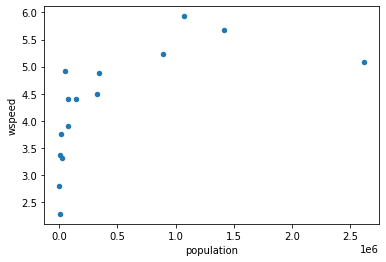

In [19]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.set_xlabel("population");

In [20]:
import numpy as np
df["population"] = np.log10(df.population)

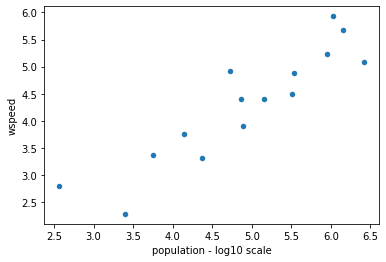

In [21]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.set_xlabel("population - log10 scale");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


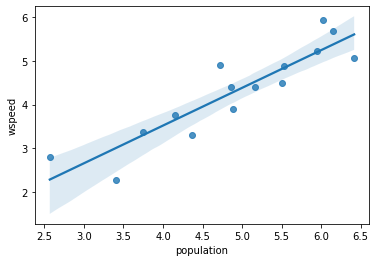

In [22]:
import seaborn as sns
sns.regplot(df['population'], df['wspeed']);

In [23]:
df["population"]

0     3.401401
1     2.568202
2     3.752048
3     4.149219
4     4.367356
5     4.720986
6     4.865104
7     4.887054
8     5.161368
9     5.505150
10    5.532754
11    5.952308
12    6.418301
13    6.152288
14    6.029384
Name: population, dtype: float64

In [24]:
def line(x, a, b):
  """....
  """
  return a * x + b
line(df["population"], 1, 0)

0     3.401401
1     2.568202
2     3.752048
3     4.149219
4     4.367356
5     4.720986
6     4.865104
7     4.887054
8     5.161368
9     5.505150
10    5.532754
11    5.952308
12    6.418301
13    6.152288
14    6.029384
Name: population, dtype: float64

In [25]:
def sse(y_o, y_p):
  """...
  """
  return ((y_o - y_p)**2).sum()
sse(df["wspeed"],  df["wspeed"])

0.0

In [26]:
minsse = 1.0e7
for a in np.arange(0.5, 2, 0.01):
  for b in np.arange(-1, 1, 0.01):
    prediction = line(df["population"], a, b)
    thissse = sse(df["wspeed"], prediction)
    if thissse < minsse:
      minsse = thissse
      a_manual, b_manual = a, b

In [27]:
a_manual, b_manual

(0.8700000000000003, 0.030000000000000915)

In [28]:
x = np.linspace(2.5, 6.5, 2)
x

array([2.5, 6.5])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


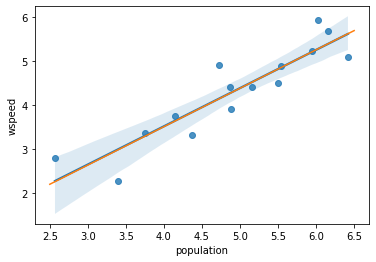

In [29]:
ax = sns.regplot(df['population'], df['wspeed']);
ax.plot(x, line(x, a_manual, b_manual))

In [30]:
df["population"]

0     3.401401
1     2.568202
2     3.752048
3     4.149219
4     4.367356
5     4.720986
6     4.865104
7     4.887054
8     5.161368
9     5.505150
10    5.532754
11    5.952308
12    6.418301
13    6.152288
14    6.029384
Name: population, dtype: float64

In [31]:
import statsmodels.api as sma
X = sma.add_constant(df["population"])
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,population
0,1.0,3.401401
1,1.0,2.568202
2,1.0,3.752048
3,1.0,4.149219
4,1.0,4.367356
5,1.0,4.720986
6,1.0,4.865104
7,1.0,4.887054
8,1.0,5.161368
9,1.0,5.505150


In [50]:
result = sma.OLS(endog=df["wspeed"], exog=X).fit()

In [51]:
result.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           3.21e-06
Time:                        01:30:40   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0566      0.560      0.101      0.921      -1.154       1.267
population     0.8653      0.112      7.740      0.000       0.624       1.107
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.531
Skew:                           0.115   Prob(JB):                        0.767
Kurtosis:                       2.107   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""